## *regression modelling for ***one*** attribute*

/tmp/ipykernel_1041/2412257173.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_2000['rainfall cumulative'] = rainfall_2000['Rainfall amount (millimetres)'].cumsum()


<Axes: >

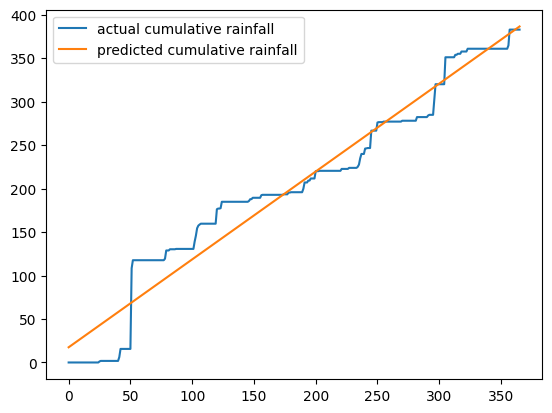

In [1]:
# Goal is to show rainfall over a certain year
import pandas as pd
import numpy
 
rainfall = pd.read_csv('data/rainfall/IDCJAC0009_047045_1800_Data.csv')
mask_2000 = rainfall['Year'] == 2000
 
rainfall_2000 = rainfall[mask_2000]
 
rainfall_2000['rainfall cumulative'] = rainfall_2000['Rainfall amount (millimetres)'].cumsum()
rainfall_2000 = rainfall_2000.reset_index()
 
# x value, day in the year (index)
# y value, cumulative rainfall

x = rainfall_2000.index
y = rainfall_2000['rainfall cumulative']
coefficients = numpy.polyfit(x, y, 1)

formula = numpy.poly1d(coefficients)
rainfall_2000['predictions'] = formula(x)
 
# plotting
canvas = rainfall_2000['rainfall cumulative'].plot(legend=True, label='actual cumulative rainfall')
rainfall_2000['predictions'].plot(ax=canvas, legend=True, label='predicted cumulative rainfall')



## *'polyfit1d' iris data ***fit*** across three classes*

/tmp/ipykernel_1041/311031839.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_just_setosa['predictions'] = formula(iris_just_setosa['petal width'])
/tmp/ipykernel_1041/311031839.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_just_virginica['predictions'] = formula(iris_just_virginica['petal width'])
/tmp/ipykernel_1041/311031839.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

<Axes: xlabel='petal width', ylabel='sepal width'>

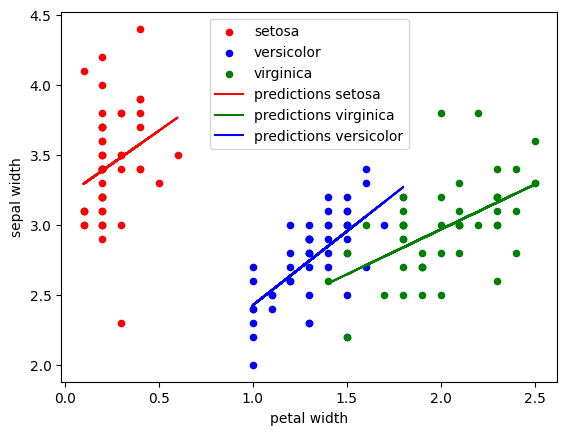

In [5]:
import numpy as np
import pandas as pd
 
iris = pd.read_csv('data/iris.csv')
mask_no_22 = iris['petal width'] != 22.0
iris = iris[mask_no_22]
iris = iris.dropna()
 
just_setosa = iris["class"] == "Iris-setosa"
just_versicolor = iris["class"] == "Iris-versicolor"
just_virginica = iris["class"] == "Iris-virginica"
 
existing_plot = iris[just_setosa].plot(kind="scatter", color="Red", x="petal width", y="sepal width", label="setosa")
iris[just_versicolor].plot(kind="scatter", color="Blue", x="petal width", y="sepal width", ax=existing_plot, label="versicolor")
iris[just_virginica].plot(kind="scatter", color="Green", x="petal width", y="sepal width", ax=existing_plot, label="virginica")
 
# 'predict' line for setosa
iris_just_setosa = iris[just_setosa]  # getting rows for just_setosa
coefficients = np.polyfit(iris_just_setosa['petal width'], iris_just_setosa['sepal width'], 1) # finding coefficients using x and y values from the just_setosa dataframe
formula = np.poly1d(coefficients)
iris_just_setosa['predictions'] = formula(iris_just_setosa['petal width'])
iris_just_setosa.plot(kind='line', color='red', x='petal width', y='predictions', label="predictions setosa", ax=existing_plot)
 
# 'predict' line for virginica
iris_just_virginica = iris[just_virginica]  # getting rows for just_virginica
coefficients = np.polyfit(iris_just_virginica['petal width'], iris_just_virginica['sepal width'], 1) # finding coefficients using x and y values from the just_setosa dataframe
formula = np.poly1d(coefficients)
iris_just_virginica['predictions'] = formula(iris_just_virginica['petal width'])
iris_just_virginica.plot(kind='line', color='green', x='petal width', y='predictions', label="predictions virginica", ax=existing_plot)

# 'predict' line for versicolor
iris_just_versicolor = iris[just_versicolor]  # getting rows for just_setosa
coefficients = np.polyfit(iris_just_versicolor['petal width'], iris_just_versicolor['sepal width'], 1) # finding coefficients using x and y values from the just_setosa dataframe
formula = np.poly1d(coefficients)
iris_just_versicolor['predictions'] = formula(iris_just_versicolor['petal width'])
iris_just_versicolor.plot(kind='line', color='blue', x='petal width', y='predictions', label="predictions versicolor", ax=existing_plot)

# End of Exploration